In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import loadMovieList as lml
import normalizeRatings as nr
import scipy.io
from scipy.io import loadmat
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
import cofiCostFunc as ccf


%matplotlib inline

import seaborn as sns

In [4]:
dat = loadmat('ex8_movies.mat')
dat.keys()




dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [5]:

Y = dat['Y']
R = dat['R']
print(Y.shape)
print(Y)
print(R)

(1682, 943)
[[5 4 0 ... 5 0 0]
 [3 0 0 ... 0 0 5]
 [4 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 0 ... 1 0 0]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


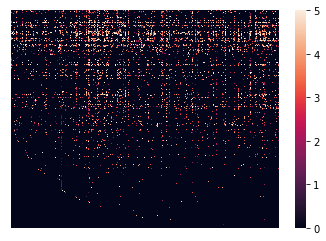

In [6]:
sns.heatmap(Y, yticklabels=False, xticklabels=False);

In [7]:
dat2=loadmat('ex8_movieParams.mat')
dat2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Theta', 'num_users', 'num_movies', 'num_features'])

In [8]:
num_users=dat2['num_users']=4
num_movies=dat2['num_movies']=5
num_features=dat2['num_features']=3
print(dat2['num_users'])
print(dat2['num_movies'])
print(dat2['num_features'])


4
5
3


In [9]:
X=dat2['X'][0:num_movies,0:num_features]
Theta = dat2['Theta'][0:num_users, 0:num_features]
Y=Y[0:num_movies, 0:num_users]
R=R[0:num_movies, 0:num_users]
print(X)
print(Theta)
print(Y)
print(R)

[[ 1.0486855  -0.40023196  1.19411945]
 [ 0.78085123 -0.38562591  0.52119779]
 [ 0.64150886 -0.54785385 -0.08379638]
 [ 0.45361782 -0.80021844  0.68048129]
 [ 0.93753789  0.1060899   0.36195295]]
[[ 0.28544362 -1.68426509  0.26293877]
 [ 0.50501321 -0.45464846  0.31746244]
 [-0.43191656 -0.47880449  0.84671111]
 [ 0.72859839 -0.27189391  0.3268436 ]]
[[5 4 0 0]
 [3 0 0 0]
 [4 0 0 0]
 [3 0 0 0]
 [3 0 0 0]]
[[1 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [10]:
def cofiCostFunc(X, Theta, Y, R, num_users, num_movies,num_features,lambda1):
    sum = 0
    i=0
    j=0
    k=0
    k1=0
    Norm_theta = 0;
    Norm_x = 0
    X_grad = np.zeros((num_movies,num_features))
    Theta_grad = np.zeros((num_users,num_features))
    
    while j < 4:
        while k1 < 3:
            Norm_theta += Theta[j,k1]**2
            k1 +=1
        k1=0
        j += 1
    k1=0
    j=0
        
    print(' norma 1',Norm_theta)
        
    while i < 5:
        while k < 3:
            Norm_x += X[i,k]**2
            k+=1
        k=0
        i+=1
    i=0
    k=0
            
    while i < 5:
        while j < 4:
            if(R[i,j]==1):
                k = 0
                A = 0
                while k < num_features:
                    A += Theta[j,k]*X[i,k]
                    k += 1
                sum += ( A - Y[i,j])**2
                X_grad[i:] += (A - Y[i,j])*Theta[j:j+1]
                Theta_grad[j:]+=(A - Y[i,j])*X[i:i+1]
            j+=1
        j=0
        i+=1
    i=0
    j=0
    k=0
                
    while i < 5:
        X_grad[i:] += lambda1*X[i:i+1]
        i+=1
        
    while j <4:
        Theta_grad[j:] += lambda1*Theta[j:j+1]
        j+=1     
    return ((sum/2 + lambda1*Norm_theta/2 + lambda1*Norm_x/2),X_grad,Theta_grad)
    

In [11]:
(J, X_grad, Theta_grad)=cofiCostFunc(X, Theta, Y, R, num_users, num_movies,num_features, 0)
print('Cost at loaded parameters:', J)
(J, X_grad, Theta_grad)=cofiCostFunc(X, Theta, Y, R, num_users, num_movies,num_features, 1.5)

 norma 1 5.394223699733425
Cost at loaded parameters: 22.22460372568567
 norma 1 5.394223699733425


In [12]:
print('Cost at loaded parameters:', J)

Cost at loaded parameters: 31.344056244274217


In [13]:
print()
print(X_grad )
print()
print(Theta_grad)




[[-0.95596339  6.97535514 -0.10861109]
 [-0.35288251  9.74956659  0.14978714]
 [-0.22302636 13.83941878 -0.74268621]
 [ 0.0738176  14.90242811 -0.07530476]
 [ 0.67634437 19.80428138 -0.27278404]]

[[-10.13985478   2.10136256  -6.76563628]
 [-12.43332502   2.58380354  -9.7635505 ]
 [-13.08119987   1.86559681  -8.49348384]
 [-11.98830229   1.45775595  -8.00321844]]


In [52]:
dat = loadmat('ex8_movies.mat')
Y = dat['Y']
R = dat['R']

In [53]:
my_ratings = np.zeros((1682, 1))

In [54]:
my_ratings[63] = 5
my_ratings[317] = 4
my_ratings[49]= 2
my_ratings[271] = 1
my_ratings[2]= 5
my_ratings[22]= 2
my_ratings[222] = 3
my_ratings[3] = 4
my_ratings[33] = 5
my_ratings[333] = 3
my_ratings[555]= 2




In [55]:
Y = np.column_stack((my_ratings, Y))
R = np.column_stack(((my_ratings != 0).astype(int), R))

In [56]:
[Ynorm, Ymean] = nr.normalizeRatings(Y, R)

In [57]:
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

In [58]:
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

In [59]:
initial_parameters = np.concatenate((X.reshape(X.size, order='F'), Theta.reshape(Theta.size, order='F')))

In [60]:
maxiter = 100
options = {'disp': True, 'maxiter':maxiter}
lambda_var=10

In [61]:
def costFunc(initial_parameters):
    return ccf.cofiCostFunc(initial_parameters, Y, R, num_users, num_movies, num_features, lambda_var)

In [62]:
print(costFunc(initial_parameters))

(1327356.6115632476, array([-759.65734703, -113.18086171, -165.64962402, ...,   -1.91191779,
       -103.35222434, -194.53174034]))


In [63]:
results = minimize(costFunc, x0=initial_parameters, options=options, method="L-BFGS-B", jac=True)
theta = results["x"]

In [64]:
X = np.reshape(theta[:num_movies*num_features], (num_movies, num_features), order='F')
Theta = np.reshape(theta[num_movies*num_features:], (num_users, num_features), order='F')

In [65]:
p = np.dot(X, Theta.T)
my_predictions = p[:,0] + Ymean.flatten()

In [66]:
ix = my_predictions.argsort()[::-1]

In [67]:
movieList = lml.loadMovieList()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7247: invalid continuation byte

In [68]:
print('\n\nTop recommendations for you:\n')
for i in range(10):
    j = ix[i]
    print('Predicting rating {:.5f} for movie {:d}'.format(my_predictions[j], j))




Top recommendations for you:

Predicting rating 7.50526 for movie 63
Predicting rating 7.27432 for movie 317
Predicting rating 7.25183 for movie 11
Predicting rating 7.11781 for movie 97
Predicting rating 7.09565 for movie 482
Predicting rating 7.08970 for movie 271
Predicting rating 7.08503 for movie 168
Predicting rating 7.07618 for movie 602
Predicting rating 7.05566 for movie 113
Predicting rating 7.04681 for movie 407


In [69]:
print('\n\nOriginal ratings provided:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {:d} for {:d}'.format(int(my_ratings[i]), i))



Original ratings provided:
Rated 5 for 2
Rated 4 for 3
Rated 2 for 22
Rated 5 for 33
Rated 2 for 49
Rated 5 for 63
Rated 3 for 222
Rated 1 for 271
Rated 4 for 317
Rated 3 for 333
Rated 2 for 555
